                                                     16.03.2018

Goethe Universität Frankfurt, FB 05 Psychologie 

Wintersemester 2017/18

PsyMSc4(Kog): Praxismodul - Python für Psychologen

Instructor: Dr. Jona Sassenhagen

Anonym

# Experiment zur Selbstpriorisierung

## Introduction

When Sui, He and Humphreys (2012) posed the question whether new self-relevant visual associations can affect performance in simple shape recognition tasks, they referred to the well proven subject that stimuli with social salience guide attention. Indeed, they found in their study an effect of associating a stimulus to the self on the subsequent modulation of perceptual processing, i.e. response times. 

Based on this self-prioritization effect, found by Sui et al., we hypothesize in the study at hand firstly, that accuracy for Ich-associated picture combinations is significantly better compared to accuracy to Stuhl-associated picture combinations, and secondly, that response times for Ich-associated picture combinations is significantly shorter compared to reaction times to Stuhl-associated picture combinations.

## Methods

### Participants:

Tested were 5 female students (24 to 28 years of age). They were all right-handed and had normal or corrected-to-normal vision. They all participated voluntarily and got a big "THANK YOU" as reward for participation. 



### The experiment 

Previous to the actual experiment, the participants were given a sheet with congruent and incongruent picture-word-associations to learn. <br> _The congruent combinations were:_


-  Ich - picture of a snake: 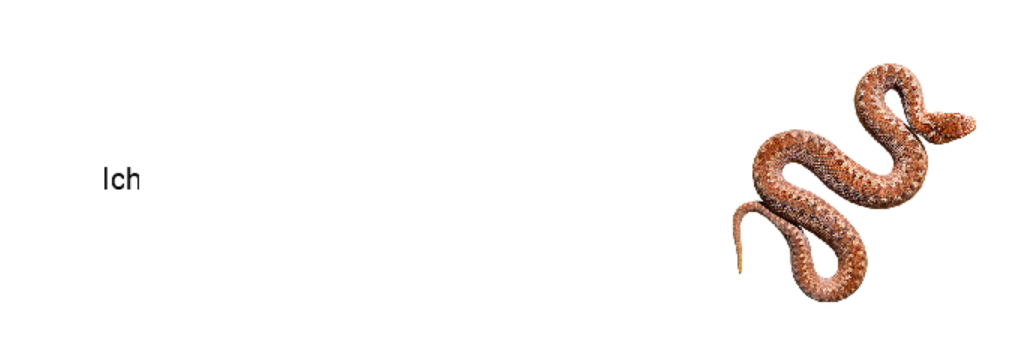
-  Stuhl - picture of a spider: 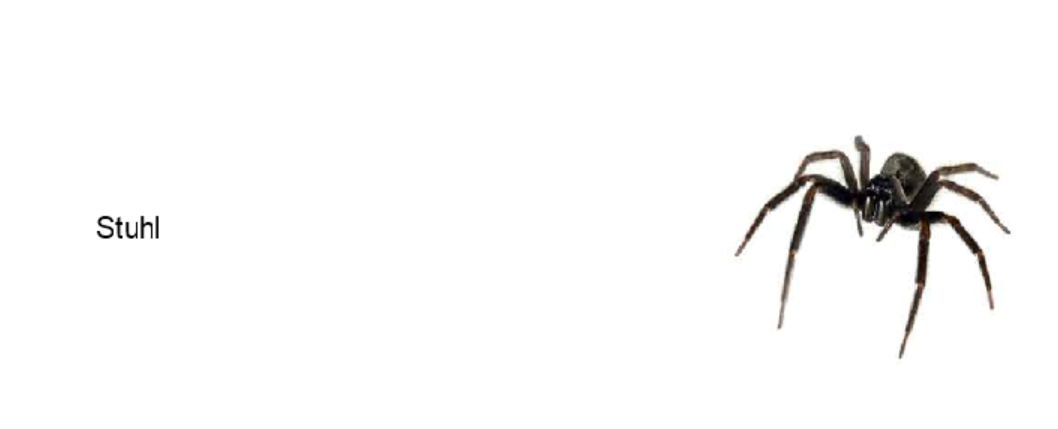

_The incongruent combinations were:_

-  Ich - picture of a spider: 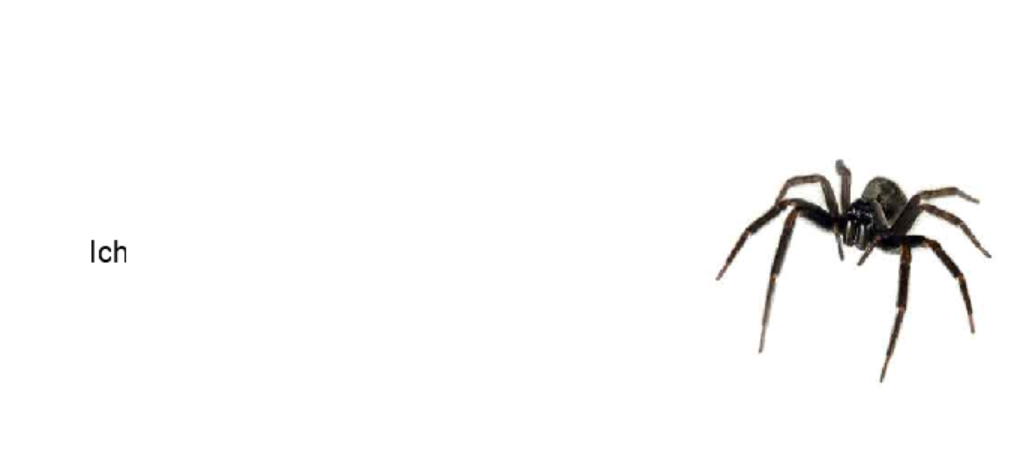
-  Stuhl - picture of a snake: 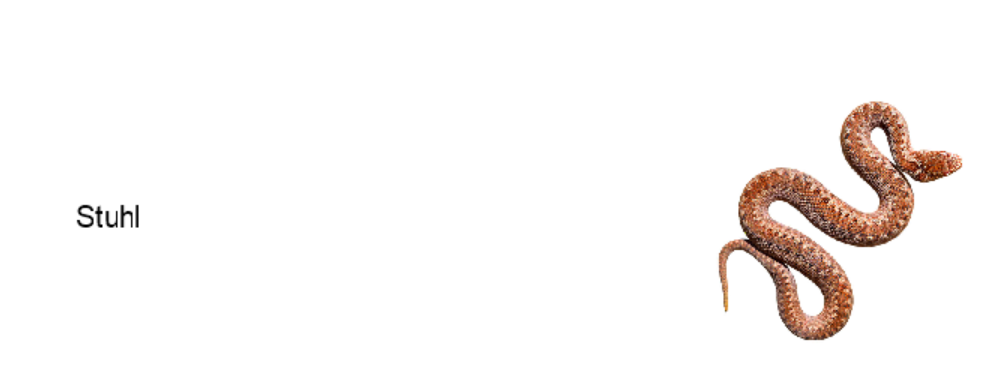



After they had learned the combinations, they conducted the actual experiment at the computer. The experiment consisted of 4 blocks with 8 trials each, so 32 trials in sum. Each trial started with a fixation circle for 500 ms. Subsequently one of the four pairings was randomly presented for 3 seconds. The participants were asked to press within these 3 seconds the 'm' button for congruent pairings and the 'c' button for incongruent pairings. A red error cross appeared for 500 ms if the pressed button was wrong or if no button at all was pressed. 



## Analysis

#### First of all there are some preparations to be done: 

In [1]:
%matplotlib inline

import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy import std, mean, sqrt

from scipy import stats
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel

#### Read the logfiles and create a dataframe:

In [2]:
from glob import glob
all_dfs = list()
for ii, file in enumerate(glob("*.csv")): 
    try:
        df = pd.read_csv(file)
        df["subj"] = ii  
        all_dfs.append(df)
    except Exception:
        pass
df = pd.concat(all_dfs)

#### Take a look at the whole dataframe:

In [3]:
df.head()

,block,trial,congruence,label,correct,rt,subj
0,0,0,False,Ich,False,1.976352,0
1,0,1,False,Stuhl,True,2.487816,0
2,0,2,True,Stuhl,False,1.827205,0
3,0,3,True,Ich,True,1.220284,0
4,0,4,True,Stuhl,False,1.224706,0


#### Checking the length of the dataframe and the number of subjects:

In [4]:
print("Lenght of df:",len(df),"\n\n", "Number of subjects:", len(df["subj"].unique()))

Lenght of df: 160 

 Number of subjects: 5


#### Checking the distribution of the rt's:

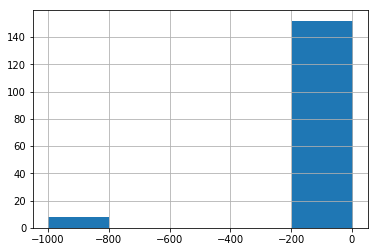

In [5]:
df["rt"].hist(bins=5)

#### This bar graph shows, that we have to get rid of -999, the code for the missing ones:

In [6]:
df_subset_1 = df.query("rt > 0")

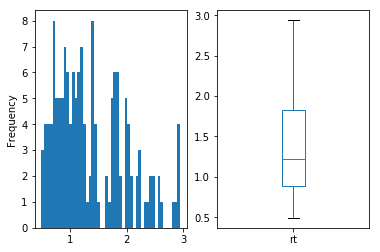

In [7]:
fig, axs = mpl.pyplot.subplots(1,2)

df_subset_1["rt"].plot(kind="hist", bins=50, ax=axs[0])
df_subset_1["rt"].plot(kind="box", sym='r.', ax=axs[1])

#### This looks much better. The next step is to select a specific subset we need to test hypothesis 1.

In [8]:
df_subset_2 = df_subset_1.query("congruence == True")

In [9]:
df_subset_2.head()

,block,trial,congruence,label,correct,rt,subj
2,0,2,True,Stuhl,False,1.827205,0
3,0,3,True,Ich,True,1.220284,0
4,0,4,True,Stuhl,False,1.224706,0
5,0,5,True,Stuhl,True,2.003463,0
7,0,7,True,Ich,True,2.011332,0


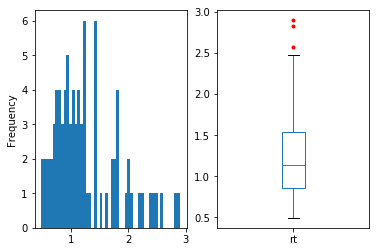

In [10]:
fig, axs = mpl.pyplot.subplots(1,2)

df_subset_2["rt"].plot(kind="hist", bins=50, ax=axs[0])
df_subset_2["rt"].plot(kind="box", sym='r.', ax=axs[1])

#### In this subset seem to be some outliers regarding the reaction times. So let's get rid of them: 

In [11]:
df_subset_3 = df_subset_2.query("rt < 2.25")

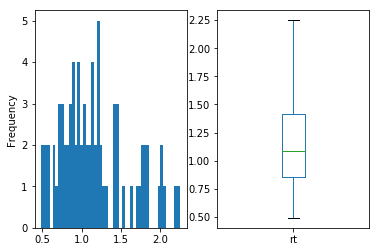

In [12]:
fig, axs = mpl.pyplot.subplots(1,2)  

df_subset_3["rt"].plot(kind="hist", bins=50, ax=axs[0])
df_subset_3["rt"].plot(kind="box", sym='.r', ax=axs[1])

#### Now the outliers are gone. The next step is to create the variables that get finally tested:

In [13]:
acc_ich = df_subset_3.query("label == 'Ich'").groupby("subj").mean()["correct"]
acc_stuhl = df_subset_3.query("label == 'Stuhl'").groupby("subj").mean()["correct"]


#### And here some descriptives: 

In [14]:
print("Accuracy for Ich:","\n\n", acc_ich,"\n\n", "Accuracy for Stuhl:", "\n\n",acc_stuhl)

Accuracy for Ich: 

 subj
0    1.000000
1    0.750000
2    1.000000
3    0.888889
4    0.909091
Name: correct, dtype: float64 

 Accuracy for Stuhl: 

 subj
0    0.500000
1    1.000000
2    0.857143
3    0.625000
4    0.250000
Name: correct, dtype: float64


In [15]:
print(acc_ich.mean(), acc_stuhl.mean())

0.9095959595959595 0.6464285714285715


In [16]:
print(acc_ich.median(), acc_stuhl.median())

0.9090909090909091 0.625


In [17]:
print(acc_ich.std(), acc_stuhl.std())

0.10276878078408125 0.29515647873420553


#### We aim at a paired sample t-test, and for that we have to check assumoptions first. Is the data normally distributed? A KS-test will show: 

In [18]:
print("Accuracy Ich:","\n\n", stats.kstest(acc_ich, "norm"),"\n\n", "Accuracy Stuhl:","\n\n", stats.kstest(acc_stuhl, "norm"))

Accuracy Ich: 

 KstestResult(statistic=0.77337264762313174, pvalue=0.0011995035040930357) 

 Accuracy Stuhl: 

 KstestResult(statistic=0.5987063256829237, pvalue=0.030642921950254642)


#### The accuracy values is for both, Ich and Stuhl, not normally distributed. As a consequence we should calculate a Wilcoxon test:  

In [19]:
wilcoxon(acc_ich, acc_stuhl)

C:\Users\Isabelle\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=2.0, pvalue=0.13801073756865956)

In [20]:
t, p = wilcoxon(acc_ich, acc_stuhl)
is_significant = p < .05

print("Accuracy is", 
      ("significantly " if is_significant else "not significantly"),
      ("better " if t > 0 else "worse"),
      "for Ich-associated combinations compared to Stuhl-associated combinations.")

Accuracy is not significantly better  for Ich-associated combinations compared to Stuhl-associated combinations.


C:\Users\Isabelle\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


#### The test statistic tells us that there is no significant difference between the accuracy for Ich and Stuhl. 

#### Because of the small sample size and just for completeness a t-test:

In [21]:
ttest_rel(acc_ich, acc_stuhl)

Ttest_relResult(statistic=1.6801819470417709, pvalue=0.16821897229338556)

In [22]:
t, p = ttest_rel(acc_ich, acc_stuhl)
is_significant = p < .05

print("Accuracy is", 
      ("significantly " if is_significant else "not significantly"),
      ("better " if t > 0 else "worse"),
      "for Ich-associated combinations compared to Stuhl-associated combinations.")

Accuracy is not significantly better  for Ich-associated combinations compared to Stuhl-associated combinations.


#### Calculating the effect size

#### Version 1:

In [23]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny - 1) * std(y, ddof=1) ** 2) / dof)

x = acc_ich
y = acc_stuhl

print(str(cohen_d(x,y)))

1.19082235432


#### Calculating the effect size

#### Version 2:

In [24]:
x = acc_ich
y = acc_stuhl

cohens_d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) **2) / 2)
print(cohens_d)

1.19082235432


#### Now it's time for another subset. To test hypothesis 2 we just need the congruent and correct values:

In [25]:
df_subset_4 = df_subset_2.query("correct == True")

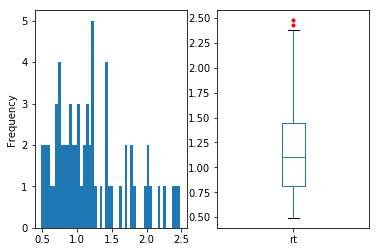

In [26]:
fig, axs = mpl.pyplot.subplots(1,2)

df_subset_4["rt"].plot(kind="hist", bins=50, ax=axs[0])
df_subset_4["rt"].plot(kind="box", sym='r.', ax=axs[1])

#### Again some outliers to get rid of...

In [27]:
df_subset_5 = df_subset_4.query("rt < 2.25")

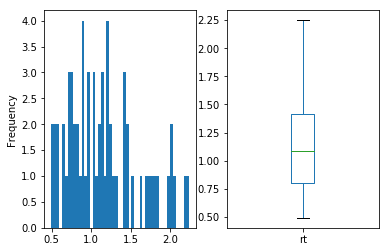

In [28]:
fig, axs = mpl.pyplot.subplots(1,2)

df_subset_5["rt"].plot(kind="hist", bins=50, ax=axs[0])
df_subset_5["rt"].plot(kind="box", sym='r.', ax=axs[1])

#### Looks better. Now let's see if there is a tendency, without grouping subjects...

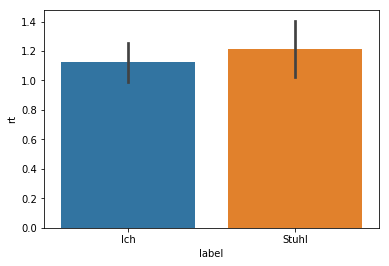

In [29]:
sns.barplot(x="label", y="rt", data=df_subset_5)

#### It seems as if RT to Ich is indeed shorter than to Stuhl...

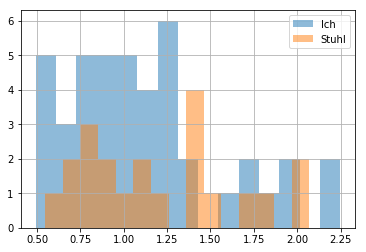

In [30]:
for label in df_subset_5["label"].unique():
    df_subset_5.query("label == '" + label + "'")["rt"].hist(bins=15, label=label, alpha=.5)
plt.legend()

#### And here it seems as if the participants responded to 'Ich' more frequently in the fast-response section between 0.5 and 1.3 seconds compared to 'Stuhl', but this is probably an effect of the small sample size. 

#### Now we create the relevant variables for the t test:

In [31]:
rt_Ich = df_subset_5.query("label == 'Ich'").groupby("subj").mean()["rt"]
rt_Stuhl = df_subset_5.query("label == 'Stuhl'").groupby("subj").mean()["rt"]
print("RT Ich:\n", rt_Ich, "\n\n", "RT Stuhl:\n", rt_Stuhl)

RT Ich:
 subj
0    1.266315
1    1.174613
2    0.780439
3    1.223140
4    0.983125
Name: rt, dtype: float64 

 RT Stuhl:
 subj
0    1.551391
1    0.894054
2    1.102102
3    1.467316
4    1.511071
Name: rt, dtype: float64


#### Another overview:

In [32]:
df_agg = df_subset_5.groupby(["subj", "label"]).mean()["rt"]
df_agg

subj  label
0     Ich      1.266315
      Stuhl    1.551391
1     Ich      1.174613
      Stuhl    0.894054
2     Ich      0.780439
      Stuhl    1.102102
3     Ich      1.223140
      Stuhl    1.467316
4     Ich      0.983125
      Stuhl    1.511071
Name: rt, dtype: float64

In [33]:
df_agg = df_subset_5.groupby(["label", "subj"]).mean()["rt"]
df_agg

label  subj
Ich    0       1.266315
       1       1.174613
       2       0.780439
       3       1.223140
       4       0.983125
Stuhl  0       1.551391
       1       0.894054
       2       1.102102
       3       1.467316
       4       1.511071
Name: rt, dtype: float64

#### Some more descriptives:

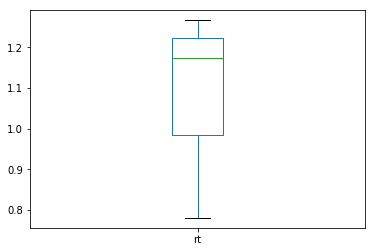

In [34]:
rt_Ich.plot(kind="box")

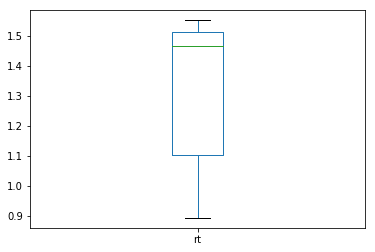

In [35]:
rt_Stuhl.plot(kind="box")

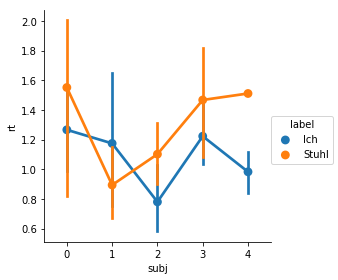

In [36]:
sns.factorplot(x="subj", y="rt", hue="label", data=df_subset_5)

In [37]:
print("Median von RT Ich:\n", rt_Ich.median(),"\n\n", "Std von RT Ich:\n", rt_Ich.std(),"\n\n", "Median von RT Stuhl:\n", rt_Stuhl.median(),"\n\n","Std von RT Stuhl:\n", rt_Stuhl.std())

Median von RT Ich:
 1.1746133764193332 

 Std von RT Ich:
 0.20194256145683873 

 Median von RT Stuhl:
 1.4673161267298 

 Std von RT Stuhl:
 0.29136101402767844


#### Testing the assumptions for the t-test:

In [38]:
print("KS result for RT Ich: ","\n\n", stats.kstest(rt_Ich, "norm"),"\n\n", "KS result for RT Stuhl:", "\n\n", stats.kstest(rt_Stuhl, "norm"))

KS result for RT Ich:  

 KstestResult(statistic=0.7824336240438432, pvalue=0.00097570971693272668) 

 KS result for RT Stuhl: 

 KstestResult(statistic=0.81435343840819496, pvalue=0.00044102635752341079)


#### The data is not normally distributed, so we acquire a wilcoxon test again:

In [39]:
wilcoxon(rt_Ich, rt_Stuhl)

C:\Users\Isabelle\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=2.0, pvalue=0.13801073756865956)

In [40]:
t, p = wilcoxon(acc_ich, acc_stuhl)
is_significant = p < .05

print("RT is", 
      ("significantly " if is_significant else "not significantly"),
      ("shorter " if t > 0 else "higher"),
      "for Ich-associated combinations compared to Stuhl-associated combinations.")

RT is not significantly shorter  for Ich-associated combinations compared to Stuhl-associated combinations.


C:\Users\Isabelle\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


#### And again the sample is too small... 

#### A t-test for completion:

In [41]:
ttest_rel(rt_Stuhl, rt_Ich)

Ttest_relResult(statistic=1.6360133980438427, pvalue=0.17717731979238308)

In [42]:
t, p = ttest_rel(acc_ich, acc_stuhl)
is_significant = p < .05

print("Accuracy is", 
      ("significantly " if is_significant else "not significantly"),
      ("shorter " if t > 0 else "higher"),
      "for Ich-associated combinations compared to Stuhl-associated combinations.")

Accuracy is not significantly shorter  for Ich-associated combinations compared to Stuhl-associated combinations.


#### Calculating the effect size

#### Version 1:

In [43]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny - 1) * std(y, ddof=1) ** 2) / dof)

x = rt_Stuhl
y = rt_Ich

print(str(cohen_d(x,y)))

0.876288619679


#### Version 2:

In [44]:
x = rt_Stuhl
y = rt_Ich

cohens_d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) **2) / 2)
print(cohens_d)

0.876288619679


## Results: 

For accuracy we obtained that participants were not significantly better for Ich-associated picture combinations compared to Stuhl-associated picture combinations. But interestingly, we got a large effect size, d=1.19.


For response times we also found no significant difference. The participants response time to Ich-associated picture combinations was not significantly shorter than the response time to Stuhl-associated picture combinations. But again, we got a large effect size, d=0.87.


## Discussion

So all in all, in this study we were not able to replicate the results found by Sui et al.. It is very likely that this failure is due to the very small sample size of 5 participants. However, the high effect sizes suggest that there might be a difference between the conditions that could be found within a larger sample. Therefore, we recommend a replication of this experiment with a proper sample size. Furthermore it would be interesting to investigate if there is not only a difference between the congruent and incongruent trials or accuracy respectively, but also if there is a difference between the different pictures we implemented (Spider & snake). 

#### Literature:

Sui, J., He, X., & Humphreys, G.W. (2012). Perceptual effects of social salience: evidence from self-prioritization effects on perceptual matching. _Journal of experimental psychology, 38_(5), 1105-1117.